<a href="https://colab.research.google.com/github/aydawudu/Transformers_Practice/blob/main/Zero_shot_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#!pip install transformers 

In [3]:
#get libraries
from transformers import pipeline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix 

In [4]:
#get data from: https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2022-10-27 12:26:30--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  1.77MB/s    in 2.7s    

2022-10-27 12:26:34 (1.77 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [5]:
#let instantiate our model
classifier=pipeline("zero-shot-classification", device=0)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [6]:
#let's try our model
classifier("This is a great movie", candidate_labels=["positive", "negative"])

{'sequence': 'This is a great movie',
 'labels': ['positive', 'negative'],
 'scores': [0.9969461560249329, 0.003053829772397876]}

In [7]:
#try a text from wikipedia:https://en.wikipedia.org/wiki/AMP-activated_protein_kinase
text = "Due to the presence of isoforms of its components, there are 12 versions of AMPK in mammals, each of which can have different tissue localizations, and different functions under different conditions.[16] AMPK is regulated allosterically and by post-translational modification, which work together.[16]"

In [8]:
#wrap the text to fit the page
def wrap(x):
  return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)

In [9]:
text=wrap(text)
text

'Due to the presence of isoforms of its components, there are 12\nversions of AMPK in mammals, each of which can have different tissue\nlocalizations, and different functions under different conditions.[16]\nAMPK is regulated allosterically and by post-translational\nmodification, which work together.[16]'

In [10]:
classifier(text, candidate_labels=["math", "geology", "biology"])

{'sequence': 'Due to the presence of isoforms of its components, there are 12\nversions of AMPK in mammals, each of which can have different tissue\nlocalizations, and different functions under different conditions.[16]\nAMPK is regulated allosterically and by post-translational\nmodification, which work together.[16]',
 'labels': ['biology', 'math', 'geology'],
 'scores': [0.8603001832962036, 0.07582084089517593, 0.06387898325920105]}

In [11]:
#read the data
df=pd.read_csv("bbc_text_cls.csv")
len(df)

2225

In [12]:
#let check out the table
df.sample(frac=1).head()

,text,labels
1485,QPR keeper Day heads for Preston\n\nQueens Par...,sport
1181,UKIP candidate suspended in probe\n\nEuroscept...,politics
155,Industrial revival hope for Japan\n\nJapanese ...,business
1612,Bell set for England debut\n\nBath prop Duncan...,sport
1020,UKIP candidate suspended\n\nEurosceptic party ...,politics


In [13]:
labels=list(set(df['labels']))
labels

['entertainment', 'sport', 'business', 'tech', 'politics']

In [14]:
#let print a random documenr
print(textwrap.fill(df.iloc[1024]['text']))

UK troops on Ivory Coast standby  Downing Street has confirmed British
troops are on standby in case they need to help evacuate several
hundred UK citizens from Ivory Coast.  The news came as it emerged
France had begun evacuating its hostages after days of anti-French
demonstrations. Trouble flared after nine French peacekeepers were
killed and President Jacques Chirac ordered the destruction of the
Ivory Coast's air force. A company of 100-120 UK troops is understood
to have been put on standby. They are ready to fly out and secure the
route from the embassy to the airport if called upon. Prime Minister
Tony Blair's official spokesman said: "There are British nationals in
Ivory Coast and as you can imagine we are making the usual contingency
plans in case the situation deteriorates further, but that's all I can
say at this stage."  He added the situation would be monitored
carefully in case evacuation became necessary. France has played a
lead role in international peacekeeping in Iv

In [15]:
#let's check the label
df.iloc[1024]['labels']

'politics'

In [16]:
#let's test our model on the selected sample
classifier(df.iloc[1024]['text'], candidate_labels=labels) 

{'sequence': 'UK troops on Ivory Coast standby\n\nDowning Street has confirmed British troops are on standby in case they need to help evacuate several hundred UK citizens from Ivory Coast.\n\nThe news came as it emerged France had begun evacuating its hostages after days of anti-French demonstrations. Trouble flared after nine French peacekeepers were killed and President Jacques Chirac ordered the destruction of the Ivory Coast\'s air force. A company of 100-120 UK troops is understood to have been put on standby. They are ready to fly out and secure the route from the embassy to the airport if called upon. Prime Minister Tony Blair\'s official spokesman said: "There are British nationals in Ivory Coast and as you can imagine we are making the usual contingency plans in case the situation deteriorates further, but that\'s all I can say at this stage."\n\nHe added the situation would be monitored carefully in case evacuation became necessary. France has played a lead role in internati

In [17]:
#fit our df to our model
preds=classifier(df['text'].tolist(), candidate_labels=labels)

In [19]:
#check the first text prediction
preds[0]

{'sequence': 'Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and wi

In [21]:
#create a list of predicted labels
predicted_labels=[d['labels'][0] for d in preds]
predicted_labels[0]

'business'

In [22]:
#Add predicted labels to our df
df["predicted_labels"]=predicted_labels
df.head()

,text,labels,predicted_labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,politics
3,High fuel prices hit BA's profits\n\nBritish A...,business,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,business


In [23]:
# Let's calculate accuracy
print("Acc:", np.mean(df['predicted_labels']==df['labels']))

Acc: 0.5649438202247191


The accuracy is about 56% which is ok, though not great. In this case random guesses will be about 20% since we have 5 classes

In [25]:
#Let compute our matrix of probabilities by converting prediction probs into an N*K Matrix according to the original label order

N=len(df) #number of samples
K=len(labels) #number of classes

label2idx={v:k for k, v in enumerate(labels)} #map from labels to index to use our existing labelling for ordering

probs=np.zeros((N, K)) #instantiate our probability matrix
for i in range(N):
  #loop through labels and scores in corresponding order
  d=preds[i]
  for label, score in zip(d['labels'], d['scores']):
    k=label2idx[label]
    probs[i, k]=score

In [26]:
probs

array([[0.16224177, 0.06213212, 0.51250064, 0.18689679, 0.0762286 ],
       [0.12214173, 0.12084147, 0.43145519, 0.11524642, 0.21031523],
       [0.0476478 , 0.05785561, 0.35858217, 0.15931863, 0.37659574],
       ...,
       [0.11299574, 0.26673642, 0.22804463, 0.20018004, 0.19204317],
       [0.03837643, 0.03684951, 0.22602133, 0.14165473, 0.55709797],
       [0.16659716, 0.10463814, 0.27849919, 0.2216464 , 0.22861916]])

In [27]:
#compute the auc

#we will need integers labels for the aucs so lets turn our labels to integers
int_labels=[label2idx[x] for x in df['labels']]

In [29]:
int_labels[:5]

[2, 2, 2, 2, 2]

In [32]:
#turn our predictions into integers as well
int_preds=np.argmax(probs, axis=1)
cm=confusion_matrix(int_labels, int_preds, normalize="true")
cm

array([[0.41709845, 0.02590674, 0.38341969, 0.1373057 , 0.03626943],
       [0.06457926, 0.44618395, 0.38943249, 0.07240705, 0.02739726],
       [0.00588235, 0.03529412, 0.7627451 , 0.03333333, 0.1627451 ],
       [0.20199501, 0.03491272, 0.35411471, 0.37157107, 0.03740648],
       [0.00719424, 0.02398082, 0.0911271 , 0.08633094, 0.79136691]])

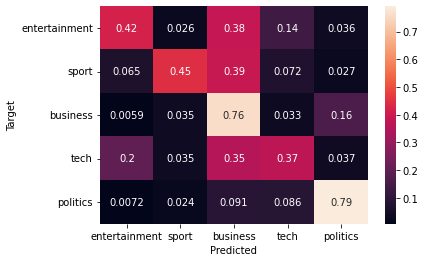

In [34]:
#let's visdualize our confusion matrix
def plot_cm(cm):
  df_cm=pd.DataFrame(cm, index=labels, columns=labels)
  ax=sns.heatmap(df_cm, annot=True, fmt='.2g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

In [35]:
f1_score(df['labels'], predicted_labels, average='micro') #normally used for binary classes but we can average

0.5649438202247191

In [36]:
roc_auc_score(int_labels, probs, multi_class='ovo')

0.8853274449719584